In [1]:
%load_ext autoreload
%autoreload 2

In [163]:
import sys
sys.path.append('../')
# import new xarray data structure
from rhkpy import rhkpy
import pylab as pl
import numpy as np
import xarray as xr

# map

In [164]:
filename_map = 'hopg_300k_2020_08_11_16_04_06_999.sm4'
mapspec = rhkpy.stmdata(filename_map)

map
iv


In [166]:
mapspec.spectra.attrs

{'filename': 'hopg_300k_2020_08_11_16_04_06_999.sm4',
 'bias': 0.39999998,
 'bias units': 'V',
 'setpoint': 499.99998585903427,
 'setpoint units': 'pA',
 'measurement date': '08/11/20',
 'measurement time': '15:49:04'}

# Reorganize $dI/dV$ line spectra

In [213]:
filename_line = 'line_9K_ABC6_2020_11_01_12_12_27_213.sm4'
linespec = rhkpy.stmdata(filename_line, datatype = 'line')

In [214]:
linespec.spectra.attrs

{'filename': 'line_9K_ABC6_2020_11_01_12_12_27_213.sm4',
 'bias': 0.49999988,
 'bias units': 'V',
 'setpoint': 99.99999439624929,
 'setpoint units': 'pA',
 'measurement date': '11/01/20',
 'measurement time': '11:32:09'}

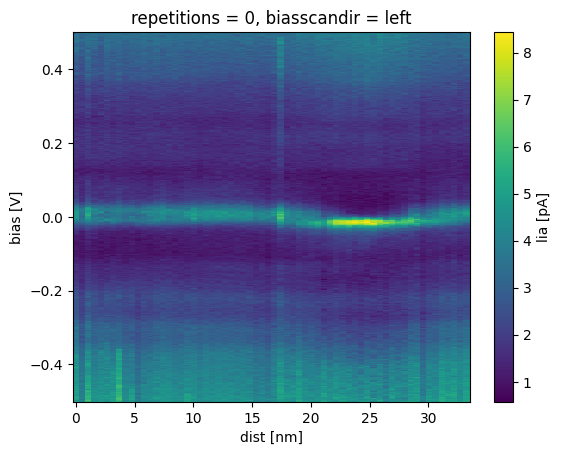

In [191]:
linespec.spectra.isel(biasscandir = 0, repetitions = 0)['lia'].plot()

In [220]:
filename_singlespec = 'dI-dV_Stripes-9K-HOPG-SPI2-3_2021_09_07_10_23_58_152.sm4'
spec = rhkpy.stmdata(filename_singlespec)

spec
iv


In [221]:
spec.spectra.attrs

{'filename': 'dI-dV_Stripes-9K-HOPG-SPI2-3_2021_09_07_10_23_58_152.sm4',
 'speccoord_x': -97.14440096786348,
 'speccoord_y': -73.07891536356692,
 'speccoord_x units': 'nm',
 'speccoord_y units': 'nm',
 'bias': 0.59999996,
 'bias units': 'V',
 'setpoint': 39.999996370720936,
 'setpoint units': 'pA',
 'measurement date': '09/07/21',
 'measurement time': '10:19:42'}

SyntaxError: keyword argument repeated: dim (2625410405.py, line 3)

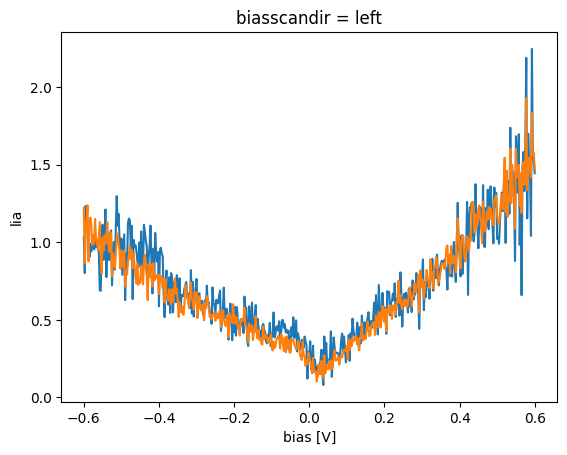

In [227]:
spec.spectra.isel(repetitions = 0, biasscandir = 0)['lia'].plot()
spec.spectra.isel(biasscandir = 0).mean(dim='repetitions')['lia'].plot()
spec.spectra.mean(dim='repetitions', 'biasscandir')['lia'].plot()